<a href="https://colab.research.google.com/github/JadonTelep/MAT-422/blob/main/SP_24_MAT_422_3_2_Continuity_And_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3 - Calculus and Optimization**

## 3.1 Introduction

Many algorithms in data science and machine learning optimize an objective function with respect to a set of desired model parameters that control how well a model explains the data. Finding good parameters can be expressed as an optimization problem. Many optimization problems rely on the concept of derivative in calculus. This chapter introduces basic concepts
for data science and includes limits, derivatives, convexity, and gradient descent and further expanded to include logistic regression, $k$-means, support vector machines, and neural networks. Further calculus and optimizations and their applications can be found in many references $[3,8-11,31,118]$.

## 3.2 Continuity and differentiation

### 3.2.1 Limits and continuity

Limits are essential to calculus and mathematical analysis, and are used to define continuity, derivatives, and integrals. In this chapter, we will use the Euclidean norm $\|\mathbf{x}\|=\sqrt{\sum_{i=1}^{d} x_{i}^{2}}$ for $\mathbf{x}=\left(x_{1}, \ldots, x_{d}\right)^{T} \in \mathbb{R}^{d}$. The open $r_{-}$ ball around $\mathbf{x} \in \mathbb{R}^{d}$ is the set of points within Euclidean distance $r$ of $\mathbf{x}$, that is,
$$
B_{r}(\mathbf{x})=\left\{\mathbf{y} \in \mathbb{R}^{d}:\|\mathbf{y}-\mathbf{x}\|<r\right\}
$$

A point $\mathbf{x} \in \mathbb{R}^{d}$ is a limit point (or accumulation point) of a set $A \subseteq \mathbb{R}^{d}$ if every open ball around $\mathbf{x}$ contains an element $\mathbf{a}$ of $A$ such that $\mathbf{a} \neq \mathbf{x}$ as in Fig. 3.1. A set $A$ is closed if every limit point of $A$ belongs to $A$. A set $A$ is open if there is a $B_{r}(\mathbf{x}) \subseteq A$ for all $x \in A$ as in Fig. 3.2. A set $A \subseteq \mathbb{R}^{d}$ is bounded if there exists an $r>0$ such that $A \subseteq B_{r}(\mathbf{0})$, where $\mathbf{0}=(0, \ldots, 0)^{T}$.

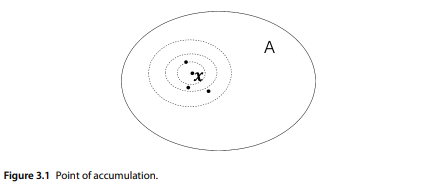

**Definition 3.2.1** (Limits of a function). Let $f: D \rightarrow \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^{d}$. Then $f$ is said to have a limit $L \in \mathbb{R}$ as $\mathbf{x}$ approaches a if: for any $\varepsilon>0$, there exists a $\delta>0$ such that $|f(\mathbf{x})-L|<\varepsilon$ for all $\mathbf{x} \in D \cap B_{\delta}(\mathbf{a}) \backslash\{\mathbf{a}\}$. This is written as
$$
\lim _{\mathbf{x} \rightarrow \mathbf{a}} f(\mathbf{x})=L
$$

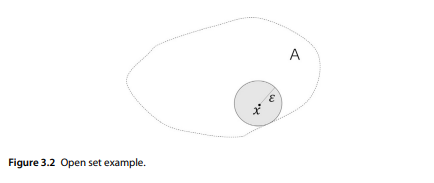

Continuous function is a function that does not have any abrupt changes in value, known as discontinuities. The definition of continuity of a function can be visualized in Fig. 3.3. Note that we explicitly exclude a itself from having to satisfy the condition $|f(\mathbf{x})-L|<\varepsilon$. In particular, we may have $f(\mathbf{a}) \neq L$. We also do not restrict a to be in $D$.

**Definition 3.2.2** (Continuous function). Let $f: D \rightarrow \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^{d}$. Then $f$ is said to be continuous at $\mathbf{a} \in D$ if
$$
\lim _{\mathbf{x} \rightarrow \mathbf{a}} f(\mathbf{x})=f(\mathbf{a})
$$

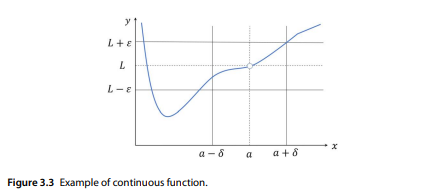

Fig. 3.3 is an example of a continuous function. Functions are often obtained from the composition of simpler ones. We will use the standard notation $h=g \circ f$ for the function $h(\mathbf{x})=g(f(\mathbf{x}))$ as in Fig. 3.4.

**Lemma 3.2.3** (Composition of continuous functions). Let $\mathbf{f}: D_{1} \rightarrow \mathbb{R}^{m}$, where $D_{1} \subseteq \mathbb{R}^{d}$, and let $\mathbf{g}: D_{2} \rightarrow \mathbb{R}^{p}$, where $D_{2} \subseteq \mathbb{R}^{m}$. Assume that $\mathbf{f}$ is continuous at $\mathbf{x}_{0}$ and that $\mathbf{g}$ is continuous $\mathbf{f}\left(\mathbf{x}_{0}\right)$. Then $g \circ f$ is continuous at $\mathbf{x}_{0}$.

The extremum lemma is very useful. We will not prove it here. Its proof can be found in many books.

**Definition 3.2.4** (Extremum). Suppose $f: D \rightarrow \mathbb{R}$ is defined on a set $D \subseteq \mathbb{R}^{d}$. We say that $f$ attains a maximum value $M$ at $\mathbf{z}^{*}$ if $f\left(\mathbf{z}^{*}\right)=M$ and $M \geq f(\mathbf{x})$ for all $\mathbf{x} \in D$. Similarly, we say $f$ attains a minimum value $m$ at $\mathbf{z}_{*}$ if $f\left(\mathbf{z}_{*}\right)=m$ and $m \leq f(\mathbf{x})$ for all $\mathbf{x} \in D$.

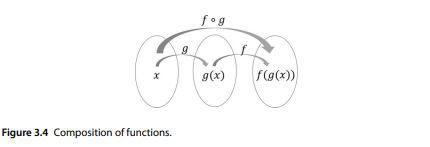

**Theorem 3.2.5** (Extreme value). Let $f: D \rightarrow \mathbb{R}$ be a real-valued, continuous function on a nonempty, closed, bounded set $D \subseteq \mathbb{R}^{d}$. Then $f$ attains a maximum and a minimum on $D$.

### 3.2.2 Derivatives

#### 3.2.2.1 Single-variable case

The derivative of a function of a real variable measures the sensitivity to change the function value (output value) with respect to another variable. We begin by reviewing the single-variable case.

**Definition 3.2.6** (Derivative). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$ and let $x_{0} \in D$ be an interior point of $D$. The derivative of $f$ at $x_{0}$ is
$$
f^{\prime}\left(x_{0}\right)=\frac{\mathrm{d} f\left(x_{0}\right)}{\mathrm{d} x}=\lim _{h \rightarrow 0} \frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}
$$
provided the limit exists.
The definition of derivative of a function can be illustrated in Fig. 3.5. The following proposition indicates that the differentiation is a linear operator.

**Proposition 3.2.7.** Let $f$ and $g$ have derivatives at $x$ and let $\alpha$ and $\beta$ be constants. The following results hold:
$$
[\alpha f(x)+\beta g(x)]^{\prime}=\alpha f^{\prime}(x)+\beta g^{\prime}(x)
$$

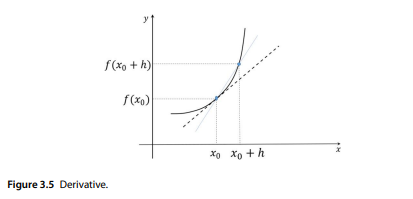

The following lemma encapsulates a key insight about the derivative of $f$ at $x_{0}$; it tells us where to find extreme values.

**Lemma 3.2.8.** Let $f: D \rightarrow \mathbb{R}$ with $D \subseteq \mathbb{R}$ and let $x_{0} \in D$ be an interior point of $D$ where $f^{\prime}\left(x_{0}\right)$ exists. If $f^{\prime}\left(x_{0}\right)>0$, then there is an open ball $B_{\delta}\left(x_{0}\right) \subseteq D$ around $x_{0}$ such that for each $x$ in $B_{\delta}\left(x_{0}\right)$ :
(a) $f(x)>f\left(x_{0}\right)$ if $x>x_{0}$,
(b) $f(x)<f\left(x_{0}\right)$ if $x<x_{0}$.

If instead $f^{\prime}\left(x_{0}\right)<0$, the opposite holds.
Proof. Take $\varepsilon=f^{\prime}\left(x_{0}\right) / 2$. By definition of the derivative, there is $\delta>0$ such that
$$
f^{\prime}\left(x_{0}\right)-\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}<\varepsilon
$$
for all $0<h<\delta$. Rearranging gives
$$
f\left(x_{0}+h\right)>f\left(x_{0}\right)+\left[f^{\prime}\left(x_{0}\right)-\varepsilon\right] h>f\left(x_{0}\right)
$$
by our choice of $\varepsilon$. The other direction is similar.
One immediate implication of Lemma 3.2.8 is the mean value theorem as in Fig. 3.7, which will lead us later to Taylor's theorem. First, we need to prove an important special case: Rolle theorem as in Fig. 3.6.

**Theorem 3.2.9** (Rolle). Let $f:[a, b] \rightarrow \mathbb{R}$ be a continuous function and assume that its derivative exists on $(a, b)$. If $f(a)=f(b)$, then there is $a<c<b$ such that $f^{\prime}(c)=0$.

Proof. If $f(x)=f(a)$ for all $x \in(a, b)$, then $f^{\prime}(x)=0$ on $(a, b)$ and we are done. So assume there is $y \in(a, b)$ such that $f(\gamma) \neq f(a)$. Assume without

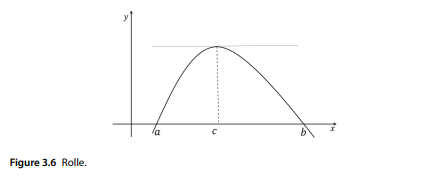

loss of generality that $f(y)>f(a)$ (otherwise consider the function $-f$ ). By the extreme value theorem, $f$ attains a maximum value at some $c \in[a, b]$. By our assumption, $a$ and $b$ cannot be the location of the maximum and it must be that $c \in(a, b)$.

We claim that $f^{\prime}(c)=0$. We argue by contradiction. Suppose $f^{\prime}(c)>0$. By Lemma 3.2.8, there is a $\delta>0$ such that $f(x)>f(c)$ for all $x \in B_{\delta}(c)$, a contradiction. A similar argument holds if $f^{\prime}(c)<0$. That concludes the proof.

**Theorem 3.2.10** (Mean value). Let $f:[a, b] \rightarrow \mathbb{R}$ be a continuous function and assume that its derivative exists on $(a, b)$. Then there is $a<c<b$ such that
$$
f(b)=f(a)+(b-a) f^{\prime}(c)
$$
or put differently
$$
\frac{f(b)-f(a)}{b-a}=f^{\prime}(c)
$$

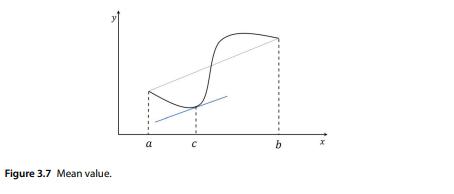

Proof. The mean value theorem is shown in Fig. 3.7. Let $\phi(x)=f(x)-$ $f(a)-\frac{f(b)-f(a)}{b-a}(x-a)$. Note that $\phi(a)=\phi(b)=0$ and $\phi^{\prime}(x)=f^{\prime}(x)-\frac{f(b)-f(a)}{b-a}$ for all $x \in(a, b)$. Thus, by Rolle, there is $c \in(a, b)$ such that $\phi^{\prime}(c)=0$. That implies $\frac{f(b)-f(a)}{b-a}=f^{\prime}(c)$ and plugging into $\phi(b)$ gives the result.

In a similar manner, one can also define higher-order derivatives. Note that, if $f^{\prime}$ exists in $D$, then it is itself a function of $x$. Then the second derivative at $x_{0}$, an interior point of $D$ is
$$
f^{\prime \prime}\left(x_{0}\right)=\frac{\mathrm{d}^{2} f\left(x_{0}\right)}{\mathrm{d} x^{2}}=\lim _{h \rightarrow 0} \frac{f^{\prime}\left(x_{0}+h\right)-f^{\prime}\left(x_{0}\right)}{h}
$$
provided the limit exists.

#### 3.2.2.2 General case

Many functions in data science involves several independent variables. For functions of several variables, we have the following generalization. As before, we let $\mathbf{e}_{i} \in \mathbb{R}^{d}$ be the $i$ th standard basis vector.

**Definition 3.2.11** (Partial derivative). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D$. The partial derivative of $f$ at $\mathbf{x}_{0}$ with respect to $x_{i}$ is
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{e}_{i}\right)-f\left(\mathbf{x}_{0}\right)}{h}
$$
provided the limit exists. If $\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}$ exists and is continuous in an open ball around $\mathbf{x}_{0}$ for all $i$, then we say that $f$ continuously differentiable at $\mathbf{x}_{0}$.

**Definition 3.2.12** (Jacobian). Let $\mathbf{f}=\left(f_{1}, \ldots, f_{m}\right): D \rightarrow \mathbb{R}^{m}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D$ where $\frac{\partial f_{j}\left(\mathbf{x}_{0}\right)}{\partial x_{i}}$ exists for all $i, j$. The Jacobian of $\mathbf{f}$ at $\mathbf{x}_{0}$ is the $d \times m$ matrix
$$
\mathbf{J}_{\mathbf{f}}\left(\mathbf{x}_{0}\right)=\left(\begin{array}{ccc}
\frac{\partial f_{1}\left(\mathbf{x}_{0}\right)}{\partial x_{1}} & \ldots & \frac{\partial f_{1}\left(\mathbf{x}_{0}\right)}{\partial x_{d}} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_{m}\left(\mathbf{x}_{0}\right)}{\partial x_{1}} & \ldots & \frac{\partial f_{m}\left(\mathbf{x}_{0}\right)}{\partial x_{d}}
\end{array}\right)
$$

For a real-valued function $f: D \rightarrow \mathbb{R}$, the Jacobian reduces to the row vector
$$
\mathbf{J}_{f}\left(\mathbf{x}_{0}\right)=\nabla f\left(\mathbf{x}_{0}\right)^{T}
$$
where the vector
$$
\nabla f\left(\mathbf{x}_{0}\right)=\left(\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{1}}, \ldots, \frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{d}}\right)^{T}
$$
is the gradient of $f$ at $\mathbf{x}_{0}$.
**Example 3.2.13.** Consider the affine function
$$
f(\mathbf{x})=\mathbf{q}^{T} \mathbf{x}+r
$$
where $\mathbf{x}=\left(x_{1}, \ldots, x_{d}\right)^{T}, \mathbf{q}=\left(q_{1}, \ldots, q_{d}\right)^{T} \in \mathbb{R}^{d}$. The partial derivatives of the linear term are given by
$$
\frac{\partial}{\partial x_{i}}\left[\mathbf{q}^{T} \mathbf{x}\right]=\frac{\partial}{\partial x_{i}}\left[\sum_{j=1}^{d} q_{j} x_{j}\right]=q_{i}
$$

So the gradient of $f$ is
$$
\nabla f(\mathbf{x})=\mathbf{q}
$$

**Example 3.2.14.** Consider the quadratic function
$$
f(\mathbf{x})=\mathbf{x}^{T} P \mathbf{x}+\mathbf{q}^{T} \mathbf{x}+r
$$
where $\mathbf{x}=\left(x_{1}, \ldots, x_{d}\right)^{T}, \mathbf{q}=\left(q_{1}, \ldots, q_{d}\right)^{T} \in \mathbb{R}^{d}$ and $P \in \mathbb{R}^{d \times d}$. The partial derivatives of the quadratic term are given by
$$
\begin{aligned}
\frac{\partial}{\partial x_{i}}\left[\mathbf{x}^{T} P \mathbf{x}\right] & =\frac{\partial}{\partial x_{i}}\left[\sum_{j, k=1}^{d} P_{j k} x_{j} x_{k}\right] \\
& =\frac{\partial}{\partial x_{i}}\left[P_{i i} x_{i}^{2}+\sum_{j=1, j \neq i}^{d} P_{j i} x_{j} x_{i}+\sum_{k=1, k \neq i}^{d} P_{i k} x_{i} x_{k}\right] \\
& =2 P_{i i} x_{i}+\sum_{j=1, j \neq i}^{d} P_{j i} x_{j}+\sum_{k=1, k \neq i}^{d} P_{i k} x_{k} \\
& =\sum_{j=1}^{d}\left[P^{T}\right]_{i j} x_{j}+\sum_{k=1}^{d}[P]_{i k} x_{k} .
\end{aligned}
$$

So the gradient of $f$ is
$$
\nabla f(\mathbf{x})=\left[P+P^{T}\right] \mathbf{x}+\mathbf{q}
$$

In calculus, the chain rule is a formula that expresses the derivative of the composition of two or more differentiable functions in terms of the derivative of each of them. The chain rule gives a convenient formula for the Jacobian of a composition. We will use the vector notation $\mathbf{h}=\mathbf{g} \circ \mathbf{f}$ for the function $\mathbf{h}(\mathbf{x})=\mathbf{g}(\mathbf{f}(\mathbf{x}))$.

**Theorem 3.2.15** (Chain rule). Let $\mathbf{f}: D_{1} \rightarrow \mathbb{R}^{m}$, where $D_{1} \subseteq \mathbb{R}^{d}$, and let $\mathbf{g}: D_{2} \rightarrow \mathbb{R}^{p}$, where $D_{2} \subseteq \mathbb{R}^{m}$. Assume that $\mathbf{f}$ is continuously differentiable at $\mathbf{x}_{0}$, an interior point of $D_{1}$, and that $\mathbf{g}$ is continuously differentiable at $\mathbf{f}\left(\mathbf{x}_{0}\right)$, an interior point of $D_{2}$. Then
$$
\mathbf{J}_{\mathbf{g} \mathbf{f}}\left(\mathbf{x}_{0}\right)=\mathbf{J}_{\mathbf{g}}\left(\mathbf{f}\left(\mathbf{x}_{0}\right)\right) \mathbf{J}_{\mathbf{f}}\left(\mathbf{x}_{0}\right)
$$
as a product of matrices.

Proof. To simplify the notation, we begin with a special case. Suppose that $f$ is a real-valued function of $\mathbf{x}=\left(x_{1}, \ldots, x_{m}\right)$ whose components are themselves functions of $t \in \mathbb{R}$. Assume $f$ is continuously differentiable at $\mathbf{x}(t)$. To compute the total derivative $\frac{\mathrm{d} f(t)}{\mathrm{d} t}$, let $\Delta x_{k}=x_{k}(t+\Delta t)-x_{k}(t), x_{k}=x_{k}(t)$ and
$$
\Delta f=f\left(x_{1}+\Delta x_{1}, \ldots, x_{m}+\Delta x_{m}\right)-f\left(x_{1}, \ldots, x_{m}\right)
$$

We seek to compute the limit $\lim _{\Delta t \rightarrow 0} \frac{\Delta f}{\Delta t}$. To relate this limit to partial derivatives of $f$, we rewrite $\Delta f$ as a telescoping sum where each term involves variation of a single variable $x_{k}$. That is,
$$
\begin{aligned}
\Delta f= & {\left[f\left(x_{1}+\Delta x_{1}, \ldots, x_{m}+\Delta x_{m}\right)-f\left(x_{1}, x_{2}+\Delta x_{2}, \ldots, x_{m}+\Delta x_{m}\right)\right] } \\
& +\left[f\left(x_{1}, x_{2}+\Delta x_{2}, \ldots, x_{m}+\Delta x_{m}\right)-f\left(x_{1}, x_{2}, x_{3}+\Delta x_{3}, \ldots, x_{m}+\Delta x_{m}\right)\right] \\
& +\cdots+\left[f\left(x_{1}, \cdots, x_{m-1}, x_{m}+\Delta x_{m}\right)-f\left(x_{1}, \ldots, x_{m}\right)\right]
\end{aligned}
$$

Applying the mean value theorem to each term gives
$$
\begin{aligned}
\Delta f= & \Delta x_{1} \frac{\partial f\left(x_{1}+\theta_{1} \Delta x_{1}, x_{2}+\Delta x_{2}, \ldots, x_{m}+\Delta x_{m}\right)}{\partial x_{1}} \\
& +\Delta x_{2} \frac{\partial f\left(x_{1}, x_{2}+\theta_{2} \Delta x_{2}, x_{3}+\Delta x_{3}, \ldots, x_{m}+\Delta x_{m}\right)}{\partial x_{2}} \\
& +\cdots+\Delta x_{m} \frac{\partial f\left(x_{1}, \cdots, x_{m-1}, x_{m}+\theta_{m} \Delta x_{m}\right)}{\partial x_{m}}
\end{aligned}
$$
where $0<\theta_{k}<1$ for $k=1, \ldots, m$. Dividing by $\Delta t$, taking the limit $\Delta t \rightarrow 0$ and using the fact that $f$ is continuously differentiable, we get
$$
\frac{\mathrm{d} f(t)}{\mathrm{d} t}=\sum_{k=1}^{m} \frac{\partial f(\mathbf{x}(t))}{\partial x_{k}} \frac{\mathrm{~d} x_{k}(t)}{\mathrm{d} t}
$$

Going back to the general case, the same argument shows that
$$
\frac{\partial h_{i}\left(\mathbf{x}_{0}\right)}{\partial x_{j}}=\sum_{k=1}^{m} \frac{\partial g_{i}\left(\mathbf{f}\left(\mathbf{x}_{0}\right)\right)}{\partial f_{k}} \frac{\partial f_{k}\left(\mathbf{x}_{0}\right)}{\partial x_{j}}
$$
where the notation $\frac{\partial g}{\partial f_{k}}$ indicates the partial derivative of $g$ with respect to its $k$ th component. In matrix form, the claim follows.

#### 3.2.2.3 Further derivatives

The directional derivative of a multivariate differentiable (scalar) function along a given vector intuitively measure the rate of change of a function along the direction.

**Definition 3.2.16** (Directional derivative). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$, let $\mathbf{x}_{0} \in D$ be an interior point of $D$, and let $\mathbf{v} \in \mathbb{R}^{d}$ be a unit vector. The directional derivative of $f$ at $\mathbf{x}_{0}$ in the direction $\mathbf{v}$ is
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{v}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{v}\right)-f\left(\mathbf{x}_{0}\right)}{h}
$$
provided the limit exists.
Note that taking $\mathbf{v}=\mathbf{e}_{i}$ recovers the $i$ th partial derivative
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{e}_{i}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{e}_{i}\right)-f\left(\mathbf{x}_{0}\right)}{h}=\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}
$$

Conversely, a general directional derivative can be expressed in terms of the partial derivatives.

**Theorem 3.2.17** (Directional derivative from gradient). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$, let $\mathbf{x}_{0} \in D$ be an interior point of $D$, and let $\mathbf{v} \in \mathbb{R}^{d}$ be a unit vector. Assume that $f$ is continuously differentiable at $\mathbf{x}_{0}$. Then the directional derivative of $f$ at $\mathbf{x}_{0}$ in the direction $\mathbf{v}$ is given by
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{v}}=\mathbf{J}_{f}\left(\mathbf{x}_{0}\right) \mathbf{v}=\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{v}
$$

Proof. Consider the composition $\beta(h)=f(\boldsymbol{\alpha}(h))$ where $\boldsymbol{\alpha}(h)=\mathbf{x}_{0}+h \mathbf{v}$. Observe that $\boldsymbol{\alpha}(0)=\mathbf{x}_{0}$ and $\beta(0)=f\left(\mathbf{x}_{0}\right)$. Then, by definition of the derivative,
$$
\frac{\mathrm{d} \beta(0)}{\mathrm{d} h}=\lim _{h \rightarrow 0} \frac{\beta(h)-\beta(0)}{h}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{v}\right)-f\left(\mathbf{x}_{0}\right)}{h}=\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{v}}
$$

Applying the chain rule, we arrive at
$$
\frac{\mathrm{d} \beta(0)}{\mathrm{d} h}=\mathbf{J}_{\beta}(0)=\mathbf{J}_{f}(\boldsymbol{\alpha}(0)) \mathbf{J}_{\boldsymbol{\alpha}}(0)=\mathbf{J}_{f}\left(\mathbf{x}_{0}\right) \mathbf{J}_{\boldsymbol{\alpha}}(0)
$$

It remains to compute $\mathbf{J}_{\boldsymbol{\alpha}}(0)$. By the linearity of derivatives,
$$
\frac{\partial \alpha_{i}(h)}{\partial h}=\left[x_{0, i}+h v_{i}\right]^{\prime}=v_{i}
$$
where we denote $\boldsymbol{\alpha}=\left(\alpha_{1}, \ldots, \alpha_{d}\right)^{T}$ and $\mathbf{x}_{0}=\left(x_{0,1}, \ldots, x_{0, d}\right)^{T}$. So $\mathbf{J}_{\boldsymbol{\alpha}}(0)=\mathbf{v}$ and we get finally
$$
\frac{\mathrm{d} \beta(0)}{\mathrm{d} h}=\mathbf{J}_{f}\left(\mathbf{x}_{0}\right) \mathbf{v}
$$
as claimed.
We can also take higher-order derivatives. We will restrict ourselves to the second order.

**Definition 3.2.18** (Second partial derivatives and Hessian). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D$. Assume that $f$ is continuously differentiable in an open ball around $\mathbf{x}_{0}$. Then $\partial f(\mathbf{x}) / \partial x_{i}$ is itself a function of $\mathbf{x}$ and its partial derivative with respect to $x_{j}$, if it exists, is denoted by
$$
\frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{j} \partial x_{i}}=\lim _{h \rightarrow 0} \frac{\partial f\left(\mathbf{x}_{0}+h \mathbf{e}_{j}\right) / \partial x_{i}-\partial f\left(\mathbf{x}_{0}\right) / \partial x_{i}}{h}
$$

To simplify the notation, we write this as $\partial^{2} f\left(\mathbf{x}_{0}\right) / \partial x_{i}^{2}$ when $j=i$. If $\partial^{2} f(\mathbf{x}) / \partial x_{j} \partial x_{i}$ and $\partial^{2} f(\mathbf{x}) / \partial x_{i}^{2}$ exist and are continuous in an open ball around $\mathbf{x}_{0}$ for all $i, j$, we say that $f$ is twice continuously differentiable at $\mathbf{x}_{0}$.

The Jacobian of the gradient $\nabla f$ is called the Hessian and is denoted by
$$
\mathbf{H}_{f}\left(\mathbf{x}_{0}\right)=\left(\begin{array}{ccc}
\frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{1}^{2}} & \cdots & \frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{d} \partial x_{1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{1} \partial x_{d}} & \cdots & \frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{d}^{2}}
\end{array}\right)
$$

When $f$ is twice continuously differentiable at $\mathbf{x}_{0}$, its Hessian is a symmetric matrix.

**Theorem 3.2.19** (Symmetry of the Hessian). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D$. Assume that $f$ is twice continuously differentiable at $\mathbf{x}_{0}$. Then for all $i \neq j$,
$$
\frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{j} \partial x_{i}}=\frac{\partial^{2} f\left(\mathbf{x}_{0}\right)}{\partial x_{i} \partial x_{j}}
$$

**Example 3.2.20.** Consider again the quadratic function
$$
f(\mathbf{x})=\frac{1}{2} \mathbf{x}^{T} P \mathbf{x}+\mathbf{q}^{T} \mathbf{x}+r
$$

Recall that the gradient of $f$ is
$$
\nabla f(\mathbf{x})=\frac{1}{2}\left[P+P^{T}\right] \mathbf{x}+\mathbf{q}
$$

Each component of $\nabla f$ is an affine function of $\mathbf{x}$, so by our previous result the gradient of $\nabla f$ is
$$
\mathbf{H}_{f}=\frac{1}{2}\left[P+P^{T}\right]
$$

Observe that this is indeed a symmetric matrix.

### 3.2.3 Taylor's theorem

Taylor's theorem gives an approximation of a differentiable function around a given point by a polynomial. We will make use of Taylor's theorem, a powerful generalization of the mean value theorem that provides polynomial approximations to a function around a point. We restrict ourselves to the case of a linear approximation with second-order error term, which will suffice for our purposes.

We begin by reviewing the single-variable case, which we will use to prove the general version.

**Theorem 3.2.21** (Taylor). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$. Suppose $f$ has a $m$ times continuous derivative on $[a, b]$. Then
$f(b)=f(a)+(b-a) f^{\prime}(a)+\frac{1}{2}(b-a)^{2} f^{\prime \prime}(a)+\ldots+\frac{(b-a)^{m-1}}{(m-1)!} f^{(m-1)}(a)+R_{m}$,
where $R_{m}=\frac{(b-a)^{m}}{(m)!} f^{(m)}(a+\theta(b-a))$ for some $0<\theta< 1$. In particular, for $m=2$, we have
$$
\begin{equation*}
f(b)=f(a)+(b-a) f^{\prime}(a)+\frac{1}{2}(b-a)^{2} f^{\prime \prime}(\xi) \tag{3.2.2}
\end{equation*}
$$
for some $a<\xi< b$.
Proof. We only look at the case when $m=2$. Other cases can be proved similarly. Let
$$
P(t)=\alpha_{0}+\alpha_{1}(t-a)+\alpha_{2}(t-a)^{2}
$$

We choose the $\alpha_{i}$ 's so that $P(a)=f(a), P^{\prime}(a)=f^{\prime}(a)$, and $P(b)=f(b)$. The first two lead to the conditions
$$
\alpha_{0}=f(a), \quad \alpha_{1}=f^{\prime}(a)
$$

Let $\phi(t)=f(t)-P(t)$. By construction, $\phi(a)=\phi(b)=0$. By Rolle, there is a $\xi^{\prime} \in(a, b)$ such that $\phi^{\prime}\left(\xi^{\prime}\right)=0$. Moreover, $\phi^{\prime}(a)=0$. Hence we can apply Rolle again - this time to $\phi^{\prime}$ on $\left[a, \xi^{\prime}\right]$. It implies that there is $\xi \in\left(a, \xi^{\prime}\right)$ such that $\phi^{\prime \prime}(\xi)=0$. The second derivative of $\phi$ at $\xi$ is
$$
0=\phi^{\prime \prime}(\xi)=f^{\prime \prime}(\xi)-P^{\prime \prime}(\xi)=f^{\prime \prime}(\xi)-2 \alpha_{2}
$$
so $\alpha_{2}=f^{\prime \prime}(\xi) / 2$. Plugging into $P$ and using $\phi(b)=0$ gives the claim.
Again, in the case of several variables, we restrict ourselves to the second order. We start with an important special case: a multivariate mean value theorem.

**Theorem 3.2.22** (Multivariate mean value). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$. Let $\mathbf{x}_{0} \in D$ and $\delta>0$ be such that $B_{\delta}\left(\mathbf{x}_{0}\right) \subseteq D$. Iff is continuously differentiable on $B_{\delta}\left(\mathbf{x}_{0}\right)$, then for any $\mathbf{x} \in B_{\delta}\left(\mathbf{x}_{0}\right)$,
$$
\begin{equation*}
f(\mathbf{x})=f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}+\xi \mathbf{p}\right)^{T} \mathbf{p} \tag{3.2.3}
\end{equation*}
$$
for some $\xi \in(0,1)$, where $\mathbf{p}=\mathbf{x}-\mathbf{x}_{0}$.
Proof. Let $\phi(t)=f(\boldsymbol{\alpha}(t))$ where $\boldsymbol{\alpha}(t)=\mathbf{x}_{0}+t \mathbf{p}$. Observe that $\phi(0)=f\left(\mathbf{x}_{0}\right)$ and $\phi(1)=f(\mathbf{x})$. By the chain rule,
$$
\phi^{\prime}(t)=\mathbf{J}_{f}(\boldsymbol{\alpha}(t)) \mathbf{J}_{\boldsymbol{\alpha}}(t)=\nabla f(\boldsymbol{\alpha}(t))^{T} \mathbf{p}=\nabla f\left(\mathbf{x}_{0}+t \mathbf{p}\right)^{T} \mathbf{p}
$$

In particular, $\phi$ has a continuous first derivative on $[0,1]$. By the mean value theorem in the single-variable case,
$$
\phi(t)=\phi(0)+t \phi^{\prime}(\xi)
$$
for some $\xi \in(0, t)$. Plugging in the expressions for $\phi(0)$ and $\phi^{\prime}(\xi)$ and taking $t=1$ will result in the claim.

**Theorem 3.2.23** (Multivariate Taylor). Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$. Let $\mathbf{x}_{0} \in D$ and $\delta>0$ be such that $B_{\delta}\left(\mathbf{x}_{0}\right) \subseteq D$. If $f$ is three times continuously differentiable on $B_{\delta}\left(\mathbf{x}_{0}\right)$, then for any $\mathbf{x} \in B_{\delta}\left(\mathbf{x}_{0}\right)$,
$$
\begin{equation*}
f(\mathbf{x})=f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{p}+\frac{1}{2} \mathbf{p}^{T} \mathbf{H}_{f}\left(\mathbf{x}_{0}\right) \mathbf{p}+O\left(\|\mathbf{p}\|^{3}\right) \tag{3.2.4}
\end{equation*}
$$
where $\mathbf{p}=\mathbf{x}-\mathbf{x}_{0}$.
Iff is twice continuously differentiable on $B_{\delta}\left(\mathbf{x}_{0}\right)$, then for any $\mathbf{x} \in B_{\delta}\left(\mathbf{x}_{0}\right)$,
$$
\begin{equation*}
f(\mathbf{x})=f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{p}+\frac{1}{2} \mathbf{p}^{T} \mathbf{H}_{f}\left(\mathbf{x}_{0}+\xi \mathbf{p}\right) \mathbf{p} \tag{3.2.5}
\end{equation*}
$$
for some $\xi \in(0,1)$, where $\mathbf{p}=\mathbf{x}-\mathbf{x}_{0}$.
Proof. We only prove the second case, the first case can be proved similarly. Let $\phi(t)=f(\boldsymbol{\alpha}(t))$ where $\boldsymbol{\alpha}(t)=\mathbf{x}_{0}+t \mathbf{p}$. Observe that $\phi(0)=f\left(\mathbf{x}_{0}\right)$ and $\phi(1)=f(\mathbf{x})$. As observed in the proof of the multivariate mean value theorem, $\phi^{\prime}(t)=\nabla f(\boldsymbol{\alpha}(t))^{T} \mathbf{p}$. By the chain rule,
$$
\phi^{\prime \prime}(t)=\frac{\mathrm{d}}{\mathrm{~d} t}\left[\sum_{i=1}^{d} \frac{\partial f(\boldsymbol{\alpha}(t))}{\partial x_{i}} p_{i}\right]=\sum_{i=1}^{d} \sum_{j=1}^{d} \frac{\partial^{2} f(\boldsymbol{\alpha}(t))}{\partial x_{j} \partial x_{i}} p_{j} p_{i}=\mathbf{p}^{T} \mathbf{H}_{f}\left(\mathbf{x}_{0}+t \mathbf{p}\right) \mathbf{p}
$$

In particular, $\phi$ has continuous first and second derivatives on [0, 1]. By Taylor's theorem in the single-variable case,
$$
\phi(t)=\phi(0)+t \phi^{\prime}(0)+\frac{1}{2} t^{2} \phi^{\prime \prime}(\xi)
$$
for some $\xi \in(0, t)$. Plugging in the expressions for $\phi(0), \phi^{\prime}(0)$, and $\phi^{\prime \prime}(\xi)$ and taking $t=1$ gives the claim.

**Example 3.2.24.** Consider the function $f\left(x_{1}, x_{2}\right)=x_{1} x_{2}+x_{1}^{2}+e^{x_{1}} \cos x_{2}$. We apply Taylor's theorem with $\mathbf{x}_{0}=(0,0)$ and $\mathbf{x}=\left(x_{1}, x_{2}\right)$. The gradient is
$$
\nabla f\left(x_{1}, x_{2}\right)=\left(x_{2}+2 x_{1}+e^{x_{1}} \cos x_{2}, x_{1}-e^{x_{1}} \sin x_{2}\right)^{T}
$$
and the Hessian is
$$
\mathbf{H}_{f}\left(x_{1}, x_{2}\right)=\left(\begin{array}{cc}
2+e^{x_{1}} \cos x_{2} & 1-e^{x_{1}} \sin x_{2} \\
1-e^{x_{1}} \sin x_{2} & -e^{x_{1}} \cos x_{2}
\end{array}\right)
$$

So $f(0,0)=1$ and $\nabla f(0,0)=(1,0)^{T}$. Thus, by Taylor's theorem,
$$
f\left(x_{1}, x_{2}\right) \approx 1+x_{1}+\frac{1}{2}\left(3 x_{1}^{2}+2 x_{1} x_{2}-x_{2}^{2}\right)
$$

**EXAMPLE:** Find a close approximation for f(x) = sin(x). To derive the Taylor series expansion for $\sin (x)$ around the point $a=0$ identify the function and calculate its derivatives at $x=0$,

$$f(x)=\sin (x)$$
$$f^{\prime}(x)=\cos (x)$$
$$f^{\prime \prime}(x)=-\sin (x)$$
$$f^{\prime \prime \prime}(x)=-\cos (x)$$
$$f^{(4)}(x)=\sin (x)$$

evaluate derivatives at $a=0$,

$$f(0)=\sin (0)=0$$
$$f^{\prime}(0)=\cos (0)=1$$
$$f^{\prime \prime}(0)=-\sin (0)=0$$
$$f^{\prime \prime \prime}(0)=-\cos (0)=-1$$
$$f^{(4)}(0)=\sin (0)=0$$


construct the Taylor Series using the Taylor series formula,

$$
f(x)=f(0)+f^{\prime}(0) x+\frac{f^{\prime \prime}(0)}{2!} x^2+\frac{f^{m \prime}(0)}{3!} x^3+\ldots
$$

and substitute the values of the derivatives,

$$
f(x)=0+1 \cdot x+0 \cdot \frac{x^2}{2!}-1 \cdot \frac{x^3}{3!}+0 \cdot \frac{x^4}{4!}+\ldots
$$

which simplifies to

$$
\sin (x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\ldots
$$

This expressions can be simplified as

$$
\sin (x)=\sum_{k=0}^n \frac{(-1)^k x^{2 k+1}}{(2 k+1)!}
$$

With each added term, the approximation will get closer and closer to the actual values

$$n = 0: \sin (x)=x$$
$$n = 1: \sin (x)=x-\frac{x^3}{3!}$$
$$n = 2: \sin (x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}$$
$$n = 3: \sin (x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}$$

<ipython-input-15-5f060de01739>:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = ((-1)**k) * (x**(2*k + 1)) / np.math.factorial(2*k + 1)


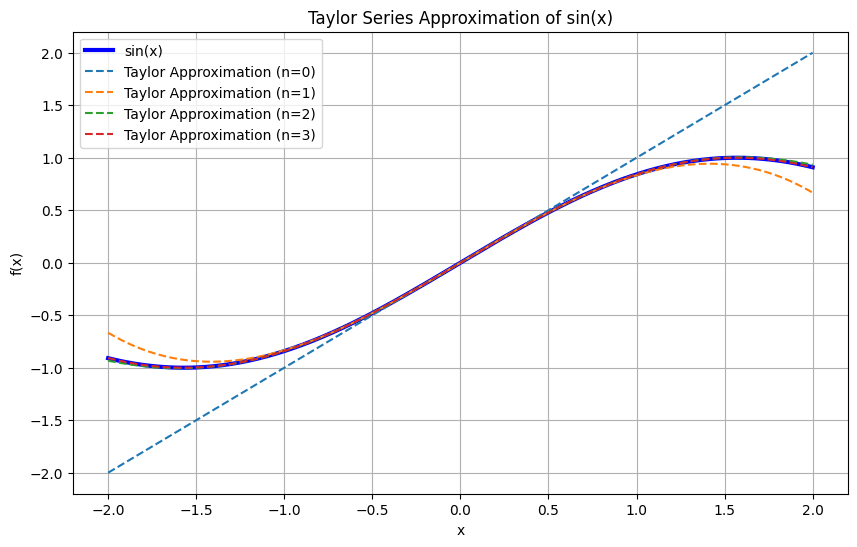

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the nth Taylor polynomial of sin(x) around x=0
def taylor_exponential(x, n):
    result = 0
    for i in range(n + 1):
        # Calculate the term using the formula (-1)^k * x^(2k + 1) / (2k + 1)!
        k = i
        term = ((-1)**k) * (x**(2*k + 1)) / np.math.factorial(2*k + 1)
        result += term
    return result

# Generate actual values
x_values = np.linspace(-2, 2, 400)
actual_values = np.sin(x_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, actual_values, label='sin(x)', linewidth="3", color='blue')
for n in range (0,4):
  taylor_values = taylor_exponential(x_values, n)  # Using n terms
  plt.plot(x_values, taylor_values, label='Taylor Approximation (n=%s)' % n, linestyle='--')
plt.title('Taylor Series Approximation of sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()